<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/Ungraded_assignment_4/Ungraded_assignment4_chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 4 The mechanics of learning

 ## 4.1 Learning is parameter estimation

t_c temp in celcius

t_u temp is unknown

In [0]:
import torch

In [0]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Linear Model

Defining Model

In [0]:
def model(t_u, w, b):
 return w * t_u + b

Defining Loss Function

In [0]:
def loss_fn(t_p, t_c):
 squared_diffs = (t_p - t_c)**2
 return squared_diffs.mean()

Initializing Parameters to invoke the model

In [0]:
w = torch.ones(1)
b = torch.zeros(1)
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [0]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [0]:
delta = 0.1
loss_rate_of_change_w = \
 (loss_fn(model(t_u, w + delta, b), t_c) -
 loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [0]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [0]:
loss_rate_of_change_b = \
 (loss_fn(model(t_u, w, b + delta), t_c) -
 loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [0]:
def dloss_fn(t_p, t_c):
 dsq_diffs = 2 * (t_p - t_c)
 return dsq_diffs

derivative w.r.t w

In [0]:
def dmodel_dw(t_u, w, b):
 return t_u

derivative w.r.t b

In [0]:
def dmodel_db(t_u, w, b):
 return 1.0

Gradient function w.r.t w and b

In [0]:
def grad_fn(t_u, t_c, t_p, w, b):
 dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
 dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
 return torch.stack([dloss_dw.mean(), dloss_db.mean()])

Training the model

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
 for epoch in range(1, n_epochs + 1):
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)
    params = params - learning_rate * grad
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
 return params

In [0]:
training_loop(
 n_epochs = 100,
 learning_rate = 1e-2,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_u,
 t_c = t_c)

Epoch 1, Loss 1763.884644
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408031744.000000
Epoch 4, Loss 64915909902336.000000
Epoch 5, Loss 217130439561707520.000000
Epoch 6, Loss 726257020202974707712.000000
Epoch 7, Loss 2429181687085405986357248.000000
Epoch 8, Loss 8125117236949438203699396608.000000
Epoch 9, Loss 27176865195881116022129584766976.000000
Epoch 10, Loss 90901075478458130961171361977860096.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [0]:
training_loop(
 n_epochs = 100,
 learning_rate = 1e-4,params = torch.tensor([1.0, 0.0]),
 t_u = t_u,
 t_c = t_c)

Epoch 1, Loss 1763.884644
Epoch 2, Loss 323.090546
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540285
Epoch 6, Loss 29.351152
Epoch 7, Loss 29.148882
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105242
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102297
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100470
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097715
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095884
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092213
Epoch 25, Loss 29.091297
Epoch 26, Loss 29.090382
Epoch 27, Loss 29.089460
Epoch 28, Loss 29.088549
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086718
Epoch 31, Loss 29.085808
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083965
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081219
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079393
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077559
Epoch 

tensor([ 0.2327, -0.0438])

Normalizing the unknown Temp

In [0]:
t_un = 0.1 * t_u

In [0]:
training_loop(
 n_epochs = 100,
 learning_rate = 1e-2,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_un,
 t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507149
Epoch 6, Loss 29.392458
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119417
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765556
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503321
Epoch 17, Loss 28.416496
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243738
Epoch 20, Loss 28.157801
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901731
Epoch 24, Loss 27.816956
Epoch 25, Loss 27.732466
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564342
Epoch 28, Loss 27.480711
Epoch 29, Loss 27.397358
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149006
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903173
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740675
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [0]:
params = training_loop(
 n_epochs = 5000,
 learning_rate = 1e-2,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_un,
 t_c = t_c)

Streaming output truncated to the last 5000 lines.
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507149
Epoch 6, Loss 29.392458
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119417
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765556
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503321
Epoch 17, Loss 28.416496
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243738
Epoch 20, Loss 28.157801
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901731
Epoch 24, Loss 27.816956
Epoch 25, Loss 27.732466
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564342
Epoch 28, Loss 27.480711
Epoch 29, Loss 27.397358
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149006
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903173
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740675
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 4

In [0]:
params

tensor([  5.3671, -17.3012])

Vizualizing the model

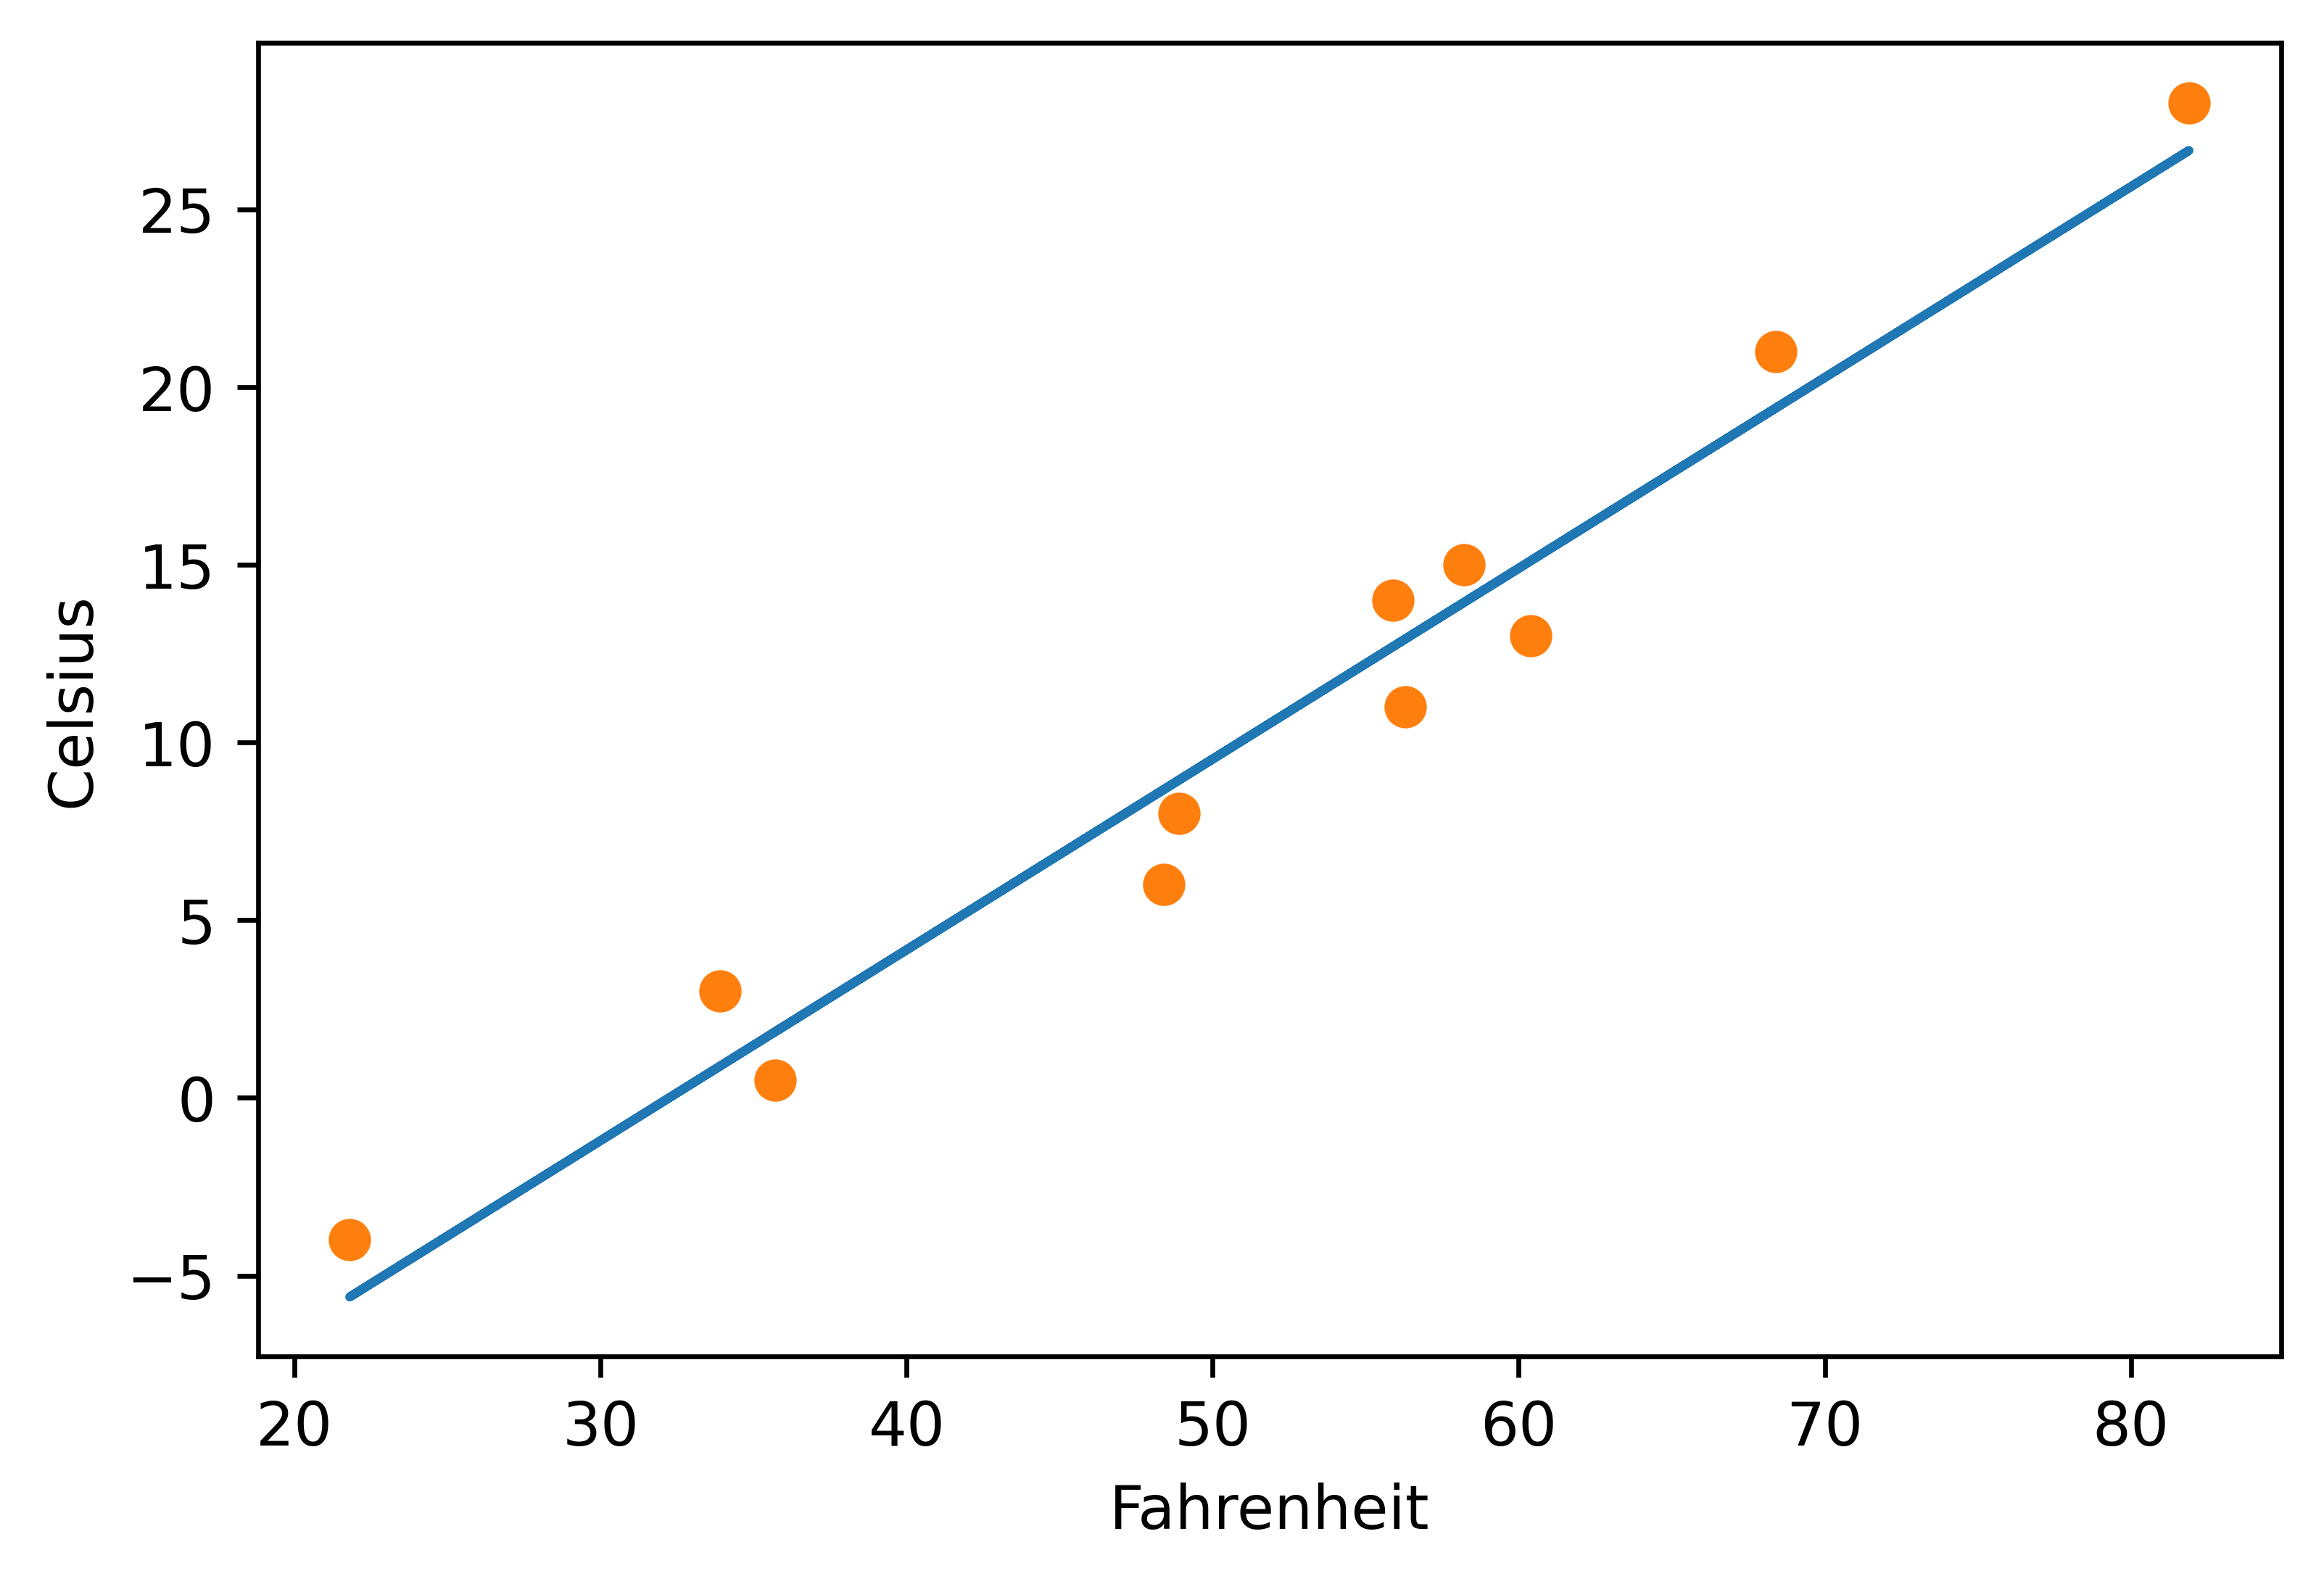

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params) 
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

## 4.2 PyTorch’s autograd: Backpropagate all things

In [0]:
def model(t_u, w, b):
 return w * t_u + b

In [0]:
def loss_fn(t_p, t_c):
 squared_diffs = (t_p - t_c)**2
 return squared_diffs.mean()

In [0]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [0]:
params.grad is None

True

In [0]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [0]:
params.grad

tensor([4517.2969,   82.6000])

In [0]:
if params.grad is not None:
 params.grad.zero_()

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [0]:
training_loop(
 n_epochs = 5000,
 learning_rate = 1e-2,
 params = torch.tensor([1.0, 0.0], requires_grad=True),
 t_u = t_un,
 t_c = t_c)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

## 4.2.1 Get list of Optimizers

In [0]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [0]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [0]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [0]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

### Update your training loop accordingly:

In [0]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
      t_p = model(t_u, *params)
      loss = loss_fn(t_p, t_c)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if epoch % 500 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [0]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
 n_epochs = 5000,
 optimizer = optimizer,
 params = params,
 t_u = t_un,
 t_c = t_c)

Epoch 500, Loss 7.860118
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012], requires_grad=True)

In [0]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(
 n_epochs = 2000,
 optimizer = optimizer,
 params = params,
 t_u = t_u,
 t_c = t_c)

Epoch 500, Loss 7.612903
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928578
Epoch 2000, Loss 2.927646


tensor([  0.5367, -17.3021], requires_grad=True)

### 4.2.2 Training, validation, and overfitting

In [0]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 5,  9,  7, 10,  1,  3,  6,  0,  4]), tensor([2, 8]))

In [0]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [0]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c,val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    if epoch <= 3 or epoch % 500 == 0:
      print('Epoch {}, Training loss {}, Validation loss {}'.format(epoch, float(train_loss), float(val_loss)))
  return params

In [0]:

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
 n_epochs = 3000,
 optimizer = optimizer,
 params = params,
 train_t_u = train_t_un, # Because you’re using SGD again, you’re back to using normalized inputs.
 val_t_u = val_t_un,
 train_t_c = train_t_c,
 val_t_c = val_t_c)

Epoch 1, Training loss 88.70997619628906, Validation loss 42.80900192260742
Epoch 2, Training loss 41.42176818847656, Validation loss 13.526876449584961
Epoch 3, Training loss 34.10702133178711, Validation loss 12.983541488647461
Epoch 500, Training loss 6.634647846221924, Validation loss 7.86492395401001
Epoch 1000, Training loss 3.1441657543182373, Validation loss 5.642121315002441
Epoch 1500, Training loss 2.685246706008911, Validation loss 4.929816722869873
Epoch 2000, Training loss 2.6249101161956787, Validation loss 4.6838531494140625
Epoch 2500, Training loss 2.6169772148132324, Validation loss 4.596289157867432
Epoch 3000, Training loss 2.6159346103668213, Validation loss 4.564749717712402


tensor([  5.3056, -16.8024], requires_grad=True)

In [0]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c,val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    with torch.no_grad(): #Context manager here.
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False 
      #All requires_grad args are forced to False inside this block.
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()



In [0]:
def calc_forward(t_u, t_c, is_train):
  with torch.set_grad_enabled(is_train):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
  return loss

## Exercises

Redefine the model to be w2 * t_u ** 2 + w1 * t_u + b.

In [0]:
w1 = torch.ones(1)
w2 = torch.ones(1)

In [101]:
def model(t_u, w, b):
 return w2 * t_u ** 2 + w1 * t_u + b


def loss_fn(t_p, t_c):
 squared_diffs = (t_p - t_c)**2
 return squared_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

params.grad is None

loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

if params.grad is not None:
 params.grad.zero_()



"""## 4.2.1 Get list of Optimizers"""

import torch.optim as optim
dir(optim)

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params





tensor([ 1.0000, -0.4818], requires_grad=True)

In [103]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
      t_p = model(t_u, *params)
      loss = loss_fn(t_p, t_c)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if epoch % 500 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop( n_epochs = 5000, optimizer = optimizer,
 params = params, t_u = t_un, t_c = t_c)




Epoch 500, Loss 95.563278
Epoch 1000, Loss 95.563286
Epoch 1500, Loss 95.563286
Epoch 2000, Loss 95.563286
Epoch 2500, Loss 95.563286
Epoch 3000, Loss 95.563286
Epoch 3500, Loss 95.563286
Epoch 4000, Loss 95.563286
Epoch 4500, Loss 95.563286
Epoch 5000, Loss 95.563286


tensor([  1.0000, -24.0879], requires_grad=True)

In [105]:
"""### 4.2.2 Training, validation, and overfitting"""

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c,val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    if epoch <= 3 or epoch % 500 == 0:
      print('Epoch {}, Training loss {}, Validation loss {}'.format(epoch, float(train_loss), float(val_loss)))
  return params


params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)


Epoch 1, Training loss 681.2130126953125, Validation loss 651.4102172851562
Epoch 2, Training loss 658.8346557617188, Validation loss 627.3795776367188
Epoch 3, Training loss 637.3424682617188, Validation loss 604.2682495117188
Epoch 500, Training loss 116.10220336914062, Validation loss 3.690572738647461
Epoch 1000, Training loss 116.10220336914062, Validation loss 3.687283992767334
Epoch 1500, Training loss 116.10220336914062, Validation loss 3.687283992767334
Epoch 2000, Training loss 116.10220336914062, Validation loss 3.687283992767334
Epoch 2500, Training loss 116.10220336914062, Validation loss 3.687283992767334
Epoch 3000, Training loss 116.10220336914062, Validation loss 3.687283992767334


tensor([  1.0000, -23.7720], requires_grad=True)

In [0]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c,val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    with torch.no_grad(): #Context manager here.
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False 
      #All requires_grad args are forced to False inside this block.
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

def calc_forward(t_u, t_c, is_train):
  with torch.set_grad_enabled(is_train):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
  return loss

In [0]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [0]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(n_epochs = 3000,optimizer = optimizer,params = params,
train_t_u = train_t_un,val_t_u = val_t_un,train_t_c = train_t_c,val_t_c = val_t_c)

